In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv(r'BIO_SRI.csv')

In [3]:
df = df.drop(['depth', 'spco2', 'o2','no3',
       'po4', 'phyc', 'si', 'ph', 'nppv', 'fe'],axis= 1)

In [4]:
latlon =df.copy()

In [5]:
latlon = latlon.drop(['chl'],axis=1)

In [6]:
latlon

,latitude,longitude,time
0,0.00,60.0,2017-12-05 12:00:00
1,0.00,60.0,2017-12-06 12:00:00
2,0.00,60.0,2017-12-07 12:00:00
3,0.00,60.0,2017-12-08 12:00:00
4,0.00,60.0,2017-12-09 12:00:00
...,...,...,...
8574327,25.25,66.5,2019-11-24 12:00:00
8574328,25.25,66.5,2019-11-25 12:00:00
8574329,25.25,66.5,2019-11-27 12:00:00
8574330,25.25,66.5,2019-11-28 12:00:00


In [7]:
df.Timestamp = pd.to_datetime(df.time,format='%Y-%m-%d %H:%M:%S') 
df.index = df.Timestamp 
df = df.resample('D')['chl'].mean()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [8]:
df

time
2017-12-05    0.402840
2017-12-06    0.401132
2017-12-07    0.387523
2017-12-08    0.364218
2017-12-09    0.349333
                ...   
2019-11-25    0.239241
2019-11-26         NaN
2019-11-27    0.242937
2019-11-28    0.247428
2019-11-29    0.249504
Freq: D, Name: chl, Length: 725, dtype: float64

In [9]:
df = df.fillna(method='ffill')

In [10]:
df

time
2017-12-05    0.402840
2017-12-06    0.401132
2017-12-07    0.387523
2017-12-08    0.364218
2017-12-09    0.349333
                ...   
2019-11-25    0.239241
2019-11-26    0.239241
2019-11-27    0.242937
2019-11-28    0.247428
2019-11-29    0.249504
Freq: D, Name: chl, Length: 725, dtype: float64

In [11]:
type(df)

pandas.core.series.Series

In [12]:
latlon=latlon.set_index('time')

In [32]:
temp=latlon.merge(df.to_frame(),left_index=True,right_index=True)

In [20]:
latlon['time']=pd.to_datetime(latlon['time']).dt.date

In [19]:
latlon=latlon.reset_index()

In [18]:
latlon.head()

,latitude,longitude
time,,
2017-12-05 12:00:00,0.0,60.0
2017-12-06 12:00:00,0.0,60.0
2017-12-07 12:00:00,0.0,60.0
2017-12-08 12:00:00,0.0,60.0
2017-12-09 12:00:00,0.0,60.0


In [30]:
df.to_frame()

,chl
time,
2017-12-05,0.402840
2017-12-06,0.401132
2017-12-07,0.387523
2017-12-08,0.364218
2017-12-09,0.349333
...,...
2019-11-25,0.239241
2019-11-26,0.239241
2019-11-27,0.242937


In [31]:
latlon =latlon.set_index('time')

In [ ]:
temp.to_csv('refine_data.csv')
lat = temp['latitude'].tolist()

In [33]:
z = temp[(temp['latitude']==0) & (temp['longitude']==60.00)]

In [34]:
z = z.drop(['latitude','longitude'],axis= 1)

In [29]:
latlon

,time,latitude,longitude
0,2017-12-05,0.00,60.0
1,2017-12-06,0.00,60.0
2,2017-12-07,0.00,60.0
3,2017-12-08,0.00,60.0
4,2017-12-09,0.00,60.0
...,...,...,...
8574327,2019-11-24,25.25,66.5
8574328,2019-11-25,25.25,66.5
8574329,2019-11-27,25.25,66.5
8574330,2019-11-28,25.25,66.5


In [ ]:
for i in range(len(temp)):
    z = temp[(temp['latitude']==lat[i]) & (temp['longitude']==long[i])]
    z = z.drop(['latitude','longitude'],axis= 1)
    dataset=z.values
    

In [50]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [51]:
dataset=z.values
#dataset
dataset=dataset.astype('float32')

In [52]:

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [53]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

485 239


In [54]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [55]:

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [56]:

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [57]:
model = Sequential([
    layers.LSTM(8, input_shape=trainX.shape[-2:]),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mae')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Train on 483 samples
Epoch 1/100
483/483 - 3s - loss: 0.1181
Epoch 2/100
483/483 - 1s - loss: 0.0294
Epoch 3/100
483/483 - 1s - loss: 0.0124
Epoch 4/100
483/483 - 1s - loss: 0.0124
Epoch 5/100
483/483 - 1s - loss: 0.0120
Epoch 6/100
483/483 - 1s - loss: 0.0121
Epoch 7/100
483/483 - 1s - loss: 0.0118
Epoch 8/100
483/483 - 1s - loss: 0.0121
Epoch 9/100
483/483 - 1s - loss: 0.0120
Epoch 10/100
483/483 - 1s - loss: 0.0125
Epoch 11/100
483/483 - 1s - loss: 0.0119
Epoch 12/100
483/483 - 1s - loss: 0.0123
Epoch 13/100
483/483 - 1s - loss: 0.0121
Epoch 14/100
483/483 - 1s - loss: 0.0121
Epoch 15/100
483/483 - 1s - loss: 0.0125
Epoch 16/100
483/483 - 1s - loss: 0.0120
Epoch 17/100
483/483 - 1s - loss: 0.0117
Epoch 18/100
483/483 - 1s - loss: 0.0120
Epoch 19/100
483/483 - 1s - loss: 0.0122
Epoch 20/100
483/483 - 1s - loss: 0.0120
Epoch 21/100
483/483 - 1s - loss: 0.0122
Epoch 22/100
483/483 - 1s - loss: 0.0122
Epoch 23/100
483/483 - 1s - loss: 0.0121
Epoch 24/100
483/483 - 1s - loss: 0.0123
Epoc

In [58]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [59]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.01 RMSE
Test Score: 0.01 RMSE


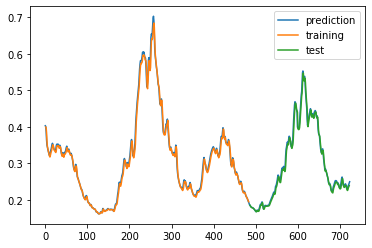

In [60]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset),label='prediction')
plt.plot(trainPredictPlot,label='training')
plt.plot(testPredictPlot,label='test')
plt.legend(loc='best')
plt.show()


In [61]:
import seaborn as sns

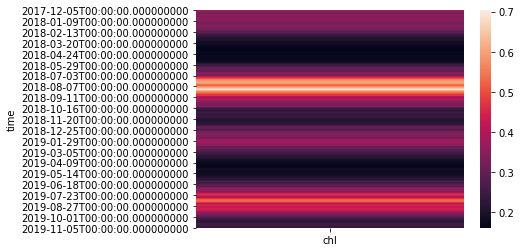

In [63]:
chl = sns.heatmap(z)

In [65]:
test

array([[0.04724193],
       [0.04427353],
       [0.04019284],
       [0.03657472],
       [0.0345574 ],
       [0.03347605],
       [0.03249443],
       [0.03150928],
       [0.03093094],
       [0.02880993],
       [0.0270322 ],
       [0.0239839 ],
       [0.02114472],
       [0.0183765 ],
       [0.01494473],
       [0.01156464],
       [0.01170614],
       [0.01531127],
       [0.01892781],
       [0.01810619],
       [0.01445192],
       [0.01395598],
       [0.01899841],
       [0.02590802],
       [0.03335816],
       [0.04230979],
       [0.04811975],
       [0.04746854],
       [0.04901814],
       [0.05747959],
       [0.06067574],
       [0.04768917],
       [0.03226393],
       [0.0251388 ],
       [0.02637184],
       [0.03309399],
       [0.03936675],
       [0.04254195],
       [0.04285938],
       [0.04163456],
       [0.04127851],
       [0.04176885],
       [0.04213569],
       [0.04201651],
       [0.04287034],
       [0.04310238],
       [0.0446547 ],
       [0.049